# T-Test Analysis of Exam Scores Dataset


## Introduction
This Jupyter Notebook will analyze the dataset containing exam scores of students who study in the morning and at night. We will conduct an **Independent T-Test** to determine whether there is a significant difference in scores between these two groups.

### Hypothesis:
- **Null Hypothesis (H₀):** There is no difference in the average test scores between students who study in the morning and those who study at night.
- **Alternative Hypothesis (H₁):** There is a significant difference in the average test scores between students who study in the morning and those who study at night.


In [3]:
import pandas as pd

In [4]:
# Load dataset
from google.colab import files

uploaded = files.upload()

Saving exam_scores_hypothesis_test.csv to exam_scores_hypothesis_test.csv


In [5]:
# Load dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['exam_scores_hypothesis_test.csv']))
print(data.head())

   Student_ID Study_Session  Exam_Score
0           1       Morning   79.967142
1           2       Morning   73.617357
2           3       Morning   81.476885
3           4       Morning   90.230299
4           5       Morning   72.658466


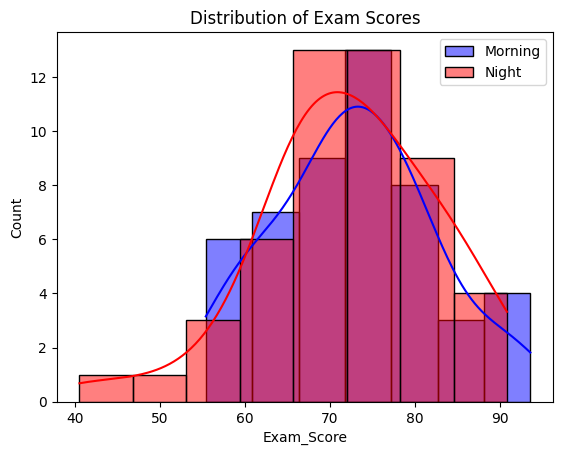

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distributions
sns.histplot(data[data['Study_Session'] == 'Morning']['Exam_Score'], kde=True, label='Morning', color='blue')
sns.histplot(data[data['Study_Session'] == 'Night']['Exam_Score'], kde=True, label='Night', color='red')
plt.legend()
plt.title("Distribution of Exam Scores")
plt.show()


In [7]:

from scipy.stats import levene

morning_scores = data[data['Study_Session'] == 'Morning']['Exam_Score']
night_scores = data[data['Study_Session'] == 'Night']['Exam_Score']

# Levene's test for equal variances
stat, p = levene(morning_scores, night_scores)
print(f"Levene’s Test p-value: {p}")

# Decide whether to assume equal variances
equal_var = p > 0.05
print("Equal variances assumption:", equal_var)


Levene’s Test p-value: 0.5263671278546134
Equal variances assumption: True


In [8]:

from scipy.stats import ttest_ind

# Conduct the independent t-test
stat, p = ttest_ind(morning_scores, night_scores, equal_var=equal_var)
print(f"T-Test Statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
if p <= 0.05:
    print("Reject the null hypothesis: There is a significant difference in exam scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference in exam scores.")


T-Test Statistic: 0.2677901854341636
P-value: 0.7894236371868926
Fail to reject the null hypothesis: No significant difference in exam scores.
